## Final Project Submission

Please fill out:
* Student name: Matthew Parker
* Student pace: full time
* Scheduled project review date/time: ????
* Instructor name: Rafael Carrasco
* Blog post URL: ????


# Importing and Inspecting

In [260]:
#let's just go ahead and import every python library in existence....just in case  :-)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import math
# plt.style.use('seaborn')

In [261]:
#reading the .csv file into a pandas dataframe
df = pd.read_csv('kc_house_data.csv')

In [262]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


It appears that two of our columns have values stored as strings. Also, three columns are missing some data.

# Cleaning the data

Check all columns for placeholders, duplicates, or other atypical values.

In [264]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/26/2014    0.006066
6/25/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

According to the reports above, we have several odd things going on:
1. There is a duplicate row in the "id" column at "795000620"
2. Over half of the "sqft_basement" column is "0.0"; additionally, 21% of all values are "?" placeholders; furthermore, the column's datatype is string instead of numeric
3. The "waterfront" column is over 99% "0.0"; this column is also missing 2,376 values (~11% of total)
4. The vast majority (90%) of values in the "view" column are "0.0"; this is in addition to 63 missing values
5. The "yr_renovated" column is 95.8% "0.0"; this column is also missing 3,842 values (~17.8% of total)

Let's deal with these one at a time, beginning with the duplicate instance of "795000620". Let's display both instances to make sure that they contain the same data.

### Dealing with duplicates

In [265]:
df.loc[df['id']==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


So it turns out that this house was sold several times over the span of a few months. This is fine, but notice that some of the columns have missing values (like 'waterfront' and 'yr_renovated'). We should probably check to make sure that the rest of the dataset doesn't have any instances of duplicates where missing values can be filled in.

In [266]:
# since we're about to slice out scattered rows, we should create a 
# new column that duplicates the original index. This will make
# merging the sliced data back in much easier later on.
df = df.reset_index()

In [267]:
duplicates = df[df.duplicated(subset='id', keep=False)]

# How many duplicates do we have?
print(len(duplicates))

353


In [268]:
# let's see if there are any houses which *only* have NaN values for 'waterfront'
duplicates.loc[duplicates['waterfront']!=0].sort_values('id')

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2494,2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,NaN,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
824,824,726049190,2/18/2015,431000.0,3,1.00,1810,7200,1.0,NaN,...,7,1130,680.0,1954,0.0,98133,47.7493,-122.351,1810,8100
17590,17590,795000620,3/11/2015,157000.0,3,1.00,1080,6250,1.0,NaN,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.330,1070,6250
10261,10261,1450100390,9/5/2014,125000.0,3,1.00,920,7314,1.0,NaN,...,6,920,0.0,1960,0.0,98002,47.2892,-122.220,1010,7420
4868,4868,1524079093,3/18/2015,369500.0,3,1.75,1300,20700,1.0,NaN,...,7,1300,0.0,1962,0.0,98024,47.5587,-121.904,1930,37638
5718,5718,1788800630,10/29/2014,96500.0,3,1.00,840,12091,1.0,NaN,...,6,840,0.0,1959,0.0,98023,47.3281,-122.343,840,9324
3536,3536,1823049202,6/10/2014,175000.0,6,1.50,1930,8400,1.0,NaN,...,7,1030,900.0,1971,0.0,98146,47.4869,-122.340,1780,9520
3947,3947,1825069031,10/16/2014,550000.0,4,1.75,2410,8447,2.0,NaN,...,8,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789
19195,19195,1901600090,4/26/2015,390000.0,5,1.75,1940,6654,1.5,NaN,...,7,1940,0.0,1953,0.0,98166,47.4663,-122.359,2300,9500
1862,1862,2143700830,10/6/2014,207000.0,4,2.50,2100,19680,1.5,NaN,...,6,2100,0.0,1914,0.0,98055,47.4787,-122.230,1340,12300


In [269]:
# let's see if there are any houses which *only* have NaN values for 'yr_renovated'
duplicates.loc[duplicates['yr_renovated']!=0].sort_values('id')

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16801,16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,0.0,...,6,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969
12406,12406,123039336,12/8/2014,244900.0,1,1.00,620,8261,1.0,0.0,...,5,620,0.0,1939,NaN,98106,47.5138,-122.364,1180,8244
14841,14841,324000530,7/8/2014,201500.0,3,1.00,1320,5000,1.5,0.0,...,7,1320,0.0,1912,NaN,98116,47.5711,-122.386,1320,4179
17590,17590,795000620,3/11/2015,157000.0,3,1.00,1080,6250,1.0,NaN,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.330,1070,6250
12422,12422,1217000340,6/6/2014,185000.0,3,1.00,1840,8100,1.0,0.0,...,7,920,920.0,1953,NaN,98166,47.4550,-122.350,1250,8100
8497,8497,1237500540,12/22/2014,270000.0,3,1.75,1370,10866,1.0,0.0,...,6,1370,0.0,1945,NaN,98052,47.6774,-122.164,1580,14250
3752,3752,1254200015,12/16/2014,405000.0,3,2.50,2260,5500,1.5,0.0,...,7,1280,980.0,1910,NaN,98117,47.6810,-122.388,1790,5355
14560,14560,1432400120,11/11/2014,165000.0,3,1.00,1010,7690,1.0,0.0,...,6,1010,0.0,1958,NaN,98058,47.4501,-122.176,1010,7619
10262,10262,1450100390,3/16/2015,208000.0,3,1.00,920,7314,1.0,0.0,...,6,920,0.0,1960,NaN,98002,47.2892,-122.220,1010,7420
4867,4867,1524079093,8/27/2014,275000.0,3,1.75,1300,20700,1.0,0.0,...,7,1300,0.0,1962,NaN,98024,47.5587,-121.904,1930,37638


So looking at the duplicated data, it seems that we would be safe to convert all 'waterfront' NaN values to '0.0', except for *id*'s '2212200100', '5054800110', and '5249801440' (which only have NaN values in both instances). The same is true for all 'yr_renovated' NaN values except for *id*'s '1922059278', '1954420170', '3262300940', '4222310010', and '7972000010'.

So, first we will remove the seven pairs of rows just mentioned since we cannot reliably fill in any missing data. Then, let's replace all of the NaN values in 'waterfront' and 'yr_renovated' with '0.0'. Finally, we will merge the *duplicates* DataFrame back into the original *df* DataFrame so that our changes are updated to the original.

In [270]:
# change index to 'id' so that we can tell pandas which rows to remove
duplicates = duplicates.set_index('id')
duplicates.drop([2212200100, 5054800110, 5249801440, 1922059278, 1954420170, 
                 3262300940, 4222310010, 7972000010], inplace=True)

# now reset the index to preserve the 'id' column, then set the index back
# to 'index' for merging with the original DataFrame
duplicates = duplicates.reset_index()
duplicates = duplicates.set_index('index')

In [271]:
# now replace all of the NaN values in 'waterfront' and 'yr_renovated' with '0.0'
duplicates.waterfront.fillna(0, inplace=True)
duplicates.yr_renovated.fillna(0, inplace=True)

In [272]:
# Now let's merge the duplicates DataFrame back into the original.
# first set df's index back to 'index' as it originally was.
df.set_index('index', inplace=True)
df.update(duplicates, overwrite=True)

# because pandas converts all integers to floats in an update, we need to set them back
df = df.astype({'id': 'int64', 'bedrooms': 'int64', 'sqft_living': 'int64', 'sqft_lot': 'int64', 
                  'condition': 'int64', 'grade': 'int64', 'sqft_above': 'int64', 'yr_built': 'int64', 
                  'zipcode': 'int64', 'sqft_living15': 'int64', 'sqft_lot15': 'int64'})

Alright, that's 1 down, only 4 more weird features to go. 

### Changing datatypes 

Let's tackle the problematic "sqft_basement" column next. First, we'll turn all the "?" values into NaN values. Then we'll convert the entire column into numeric data using the *.to_numeric* method.

In [273]:
# we define a function that will replace all "?" values with NaN
def impute_sqft_basement(value):
    if value == '?':
        return None
    else:
        return value


# now we map a lamba function to iterate the above "impute" function through
# the *sqft_basement* column
df.sqft_basement = df.sqft_basement.map(lambda x: impute_sqft_basement(x))

In [274]:
# and now we will change the data type to numeric
df.sqft_basement = pd.to_numeric(df.sqft_basement)

Okay, that's another weird column dealt with. 

Since we only have one year's worth of data, we cannot make any solid predictions as to how the time of year might impact the price of a house, so we'll drop the *date* column. The *id* is also no longer useful, so we'll drop it as well.

In [275]:
df_subset = df

In [276]:
df_subset = df_subset.drop(['date','id'], axis=1)

### Missing values

There are only a few missing values for *view*, so we'll just drop those rows. 

In [277]:
df_subset.dropna(subset=['view'], inplace=True)

OK, now on to the missing values in *sqft_basement* to contend with. About 60% of the properties have no basement and there are 454 NaN values. Intuitively, it seems like the presence/absence of a basement is likely to impact the sale price of a home, so instead of dropping the column let's just drop the rows with NaN values instead. This is only 2% of our dataset, so our model should not be significantly effected.

Furthermore, since any values for *sqft_basement* should just be the difference between *sqft_living* and *sqft_above* (or close to it), the actual values in this column are not as important. Since over half of the houses don't have a basement anyway, let's turn this column into a categorical one that just tells us whether or not a house has a basement at all.

In [278]:
# getting rid of NaN values
df_subset.dropna(subset=['sqft_basement'], inplace=True)

In [279]:
# changing all positive values to "1"
# we can just reuse and slightly change our 'impute' function from above
def impute_sqft_basement_again(value):
    if value > 0:
        return 1
    else:
        return value


df_subset.sqft_basement = df_subset.sqft_basement.map(lambda x: impute_sqft_basement_again(x))

# rename the column to make it more informative
# and also make it an integer instead of a float
df_subset.rename(columns={'sqft_basement':'basement'}, inplace=True)
df_subset = df_subset.astype({'basement': 'int64'})

As for *waterfront* and *yr_renovated*, we've got a **lot** of missing data. Since well over 90% of the values for both columns are of a single value, we'll just fill in NaNs with those values (0). Though this might slightly skew the results, it is such a small percentage that it should not make a huge impact in the long run.

In [280]:
df_subset[np.isnan(df_subset)] = 0

Now that we've cleaned our data and eliminated all NaN values, we are able to run our first OLS on our dataset, mostly just to get a rough idea of how everything is working together.

In [281]:
# split the dependent variable 'price' from the rest of the data
y = df_subset['price']
x = df_subset.drop(['price'], axis=1)

# now run an Ordinary Least Squares model
linreg = sm.OLS(y, x).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 1.121e+04
Date:                Fri, 31 May 2019   Prob (F-statistic):               0.00
Time:                        18:59:53   Log-Likelihood:            -2.8732e+05
No. Observations:               21082   AIC:                         5.747e+05
Df Residuals:                   21064   BIC:                         5.748e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.559e+04   1918.093    -18.557      0.000   -3.94e+04   -3.18e+04
bathrooms      4.109e+04   3325.325     12.357      0.000    3.46e+04    4.76e+04
sqft_living     153.1832      6.250     24.508      0.000     140.932     165.434
sqft_lot          0.1206      0.049      2.474      0.013       0.025       0.216
floors         5694.7609   3585.134      1.588      0.112   -1332.377    1.27e+04
waterfront     6.025e+05   1.84e+04     32.721      0.000    5.66e+05    6.39e+05
view           5.482e+04   2134.217     25.685      0.000    5.06e+04     5.9e+04
condition      2.759e+04   2346.204     11.760      0.000     2.3e+04    3.22e+04
grade          9.634e+04   2182.158     44.149      0.000    9.21e+04    1.01e+05
sqft_above       26.9383      6.877      3.917      0.000      13.459      40.418
basement      -5985.9188   5291.699     -1.131      0.258   -1.64e+04    4386.217
yr_built      -2570.9613     68.313    -37.635      0.000   -2704.861   -2437.062
yr_renovated     24.5682      4.019      6.113      0.000      16.690      32.446
zipcode        -524.2281     18.063    -29.022      0.000    -559.633    -488.823
lat            6.014e+05   1.08e+04     55.430      0.000     5.8e+05    6.23e+05
long          -2.225e+05   1.32e+04    -16.798      0.000   -2.48e+05   -1.96e+05
sqft_living15    23.3028      3.422      6.811      0.000      16.596      30.009
sqft_lot15       -0.3745      0.075     -5.027      0.000      -0.521      -0.228
==============================================================================
Omnibus:                    17788.418   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1764794.462
Skew:                           3.526   Prob(JB):                         0.00
Kurtosis:                      47.264   Cond. No.                     1.34e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Outliers


Now that our data has been sufficiently cleaned, let's get a look at our variables and whether they might be related.

*Warning*: this will take a while to compute due to the size of the data set.


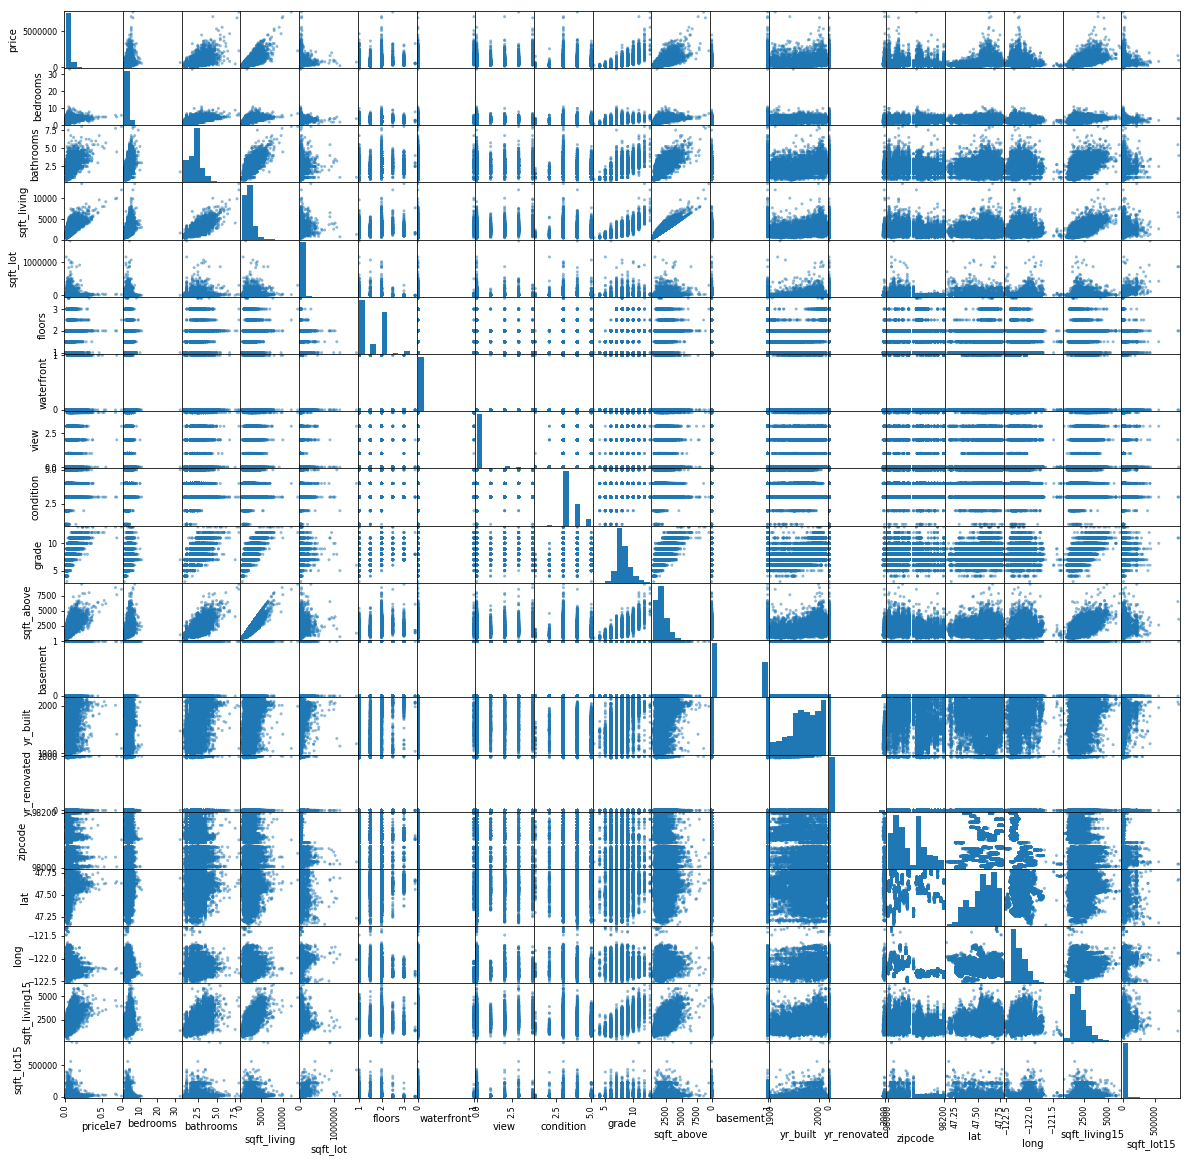

In [282]:
# let's use a scatter matrix to take a quick look at the variables
# end code line with a semicolon so that only the graph is displayed
pd.plotting.scatter_matrix(df_subset, figsize=(20,20));

That's a ***lot*** of really tiny graphs. Perhaps we should look at the individual histograms.

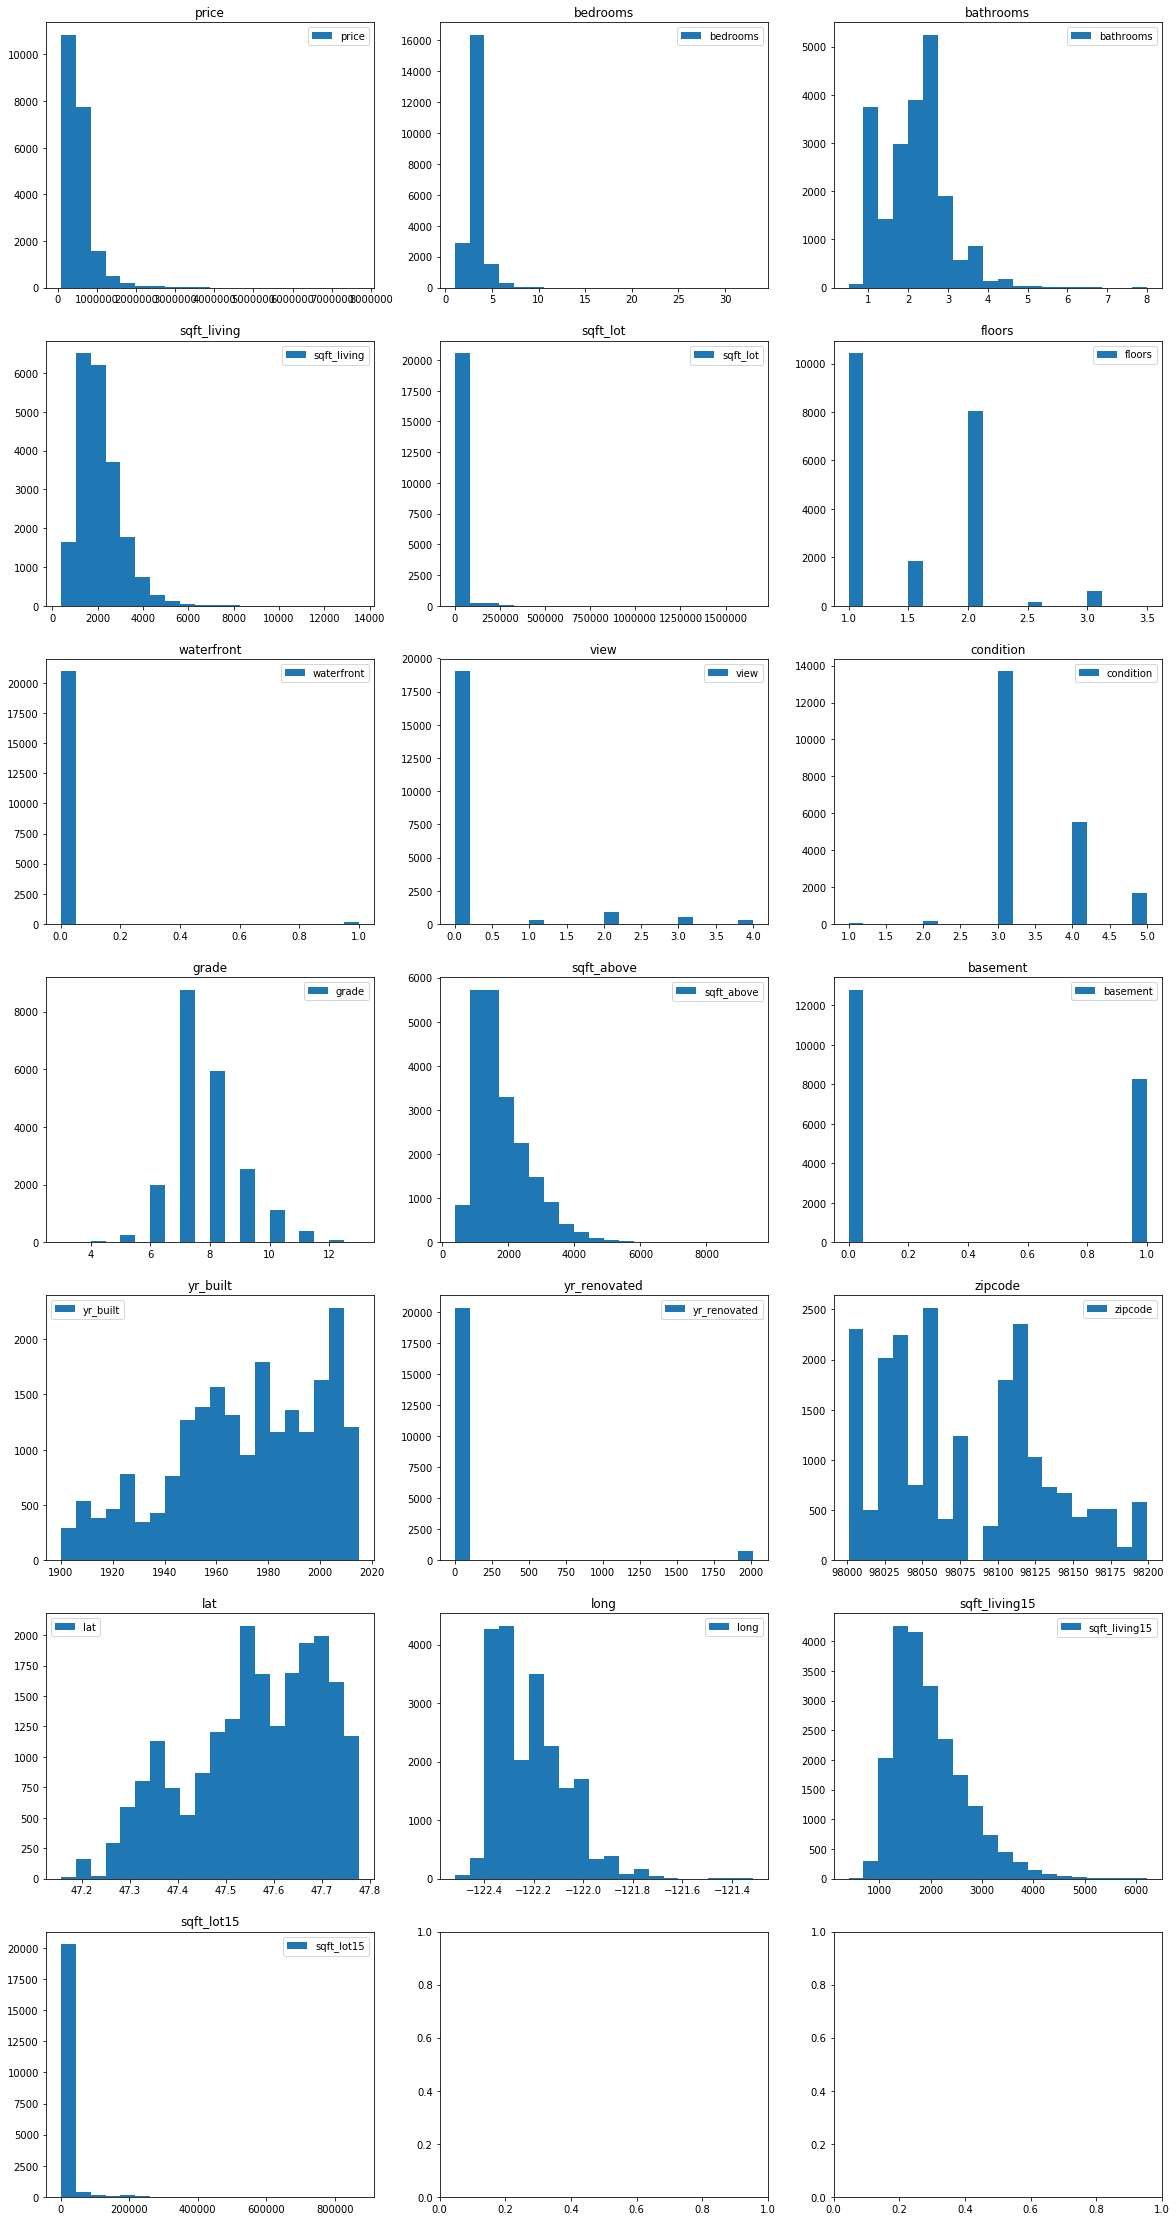

In [293]:
x = df_subset

fig, axs = plt.subplots(7, 3, figsize=(20, 40))

for index, ax in enumerate(axs.flatten()):
    if index < 19:  # to avoid throwing an error
        column = x.columns[index]
        ax.hist(x[column], bins=20)
        ax.set_title(column)
        ax.legend()
plt.show()

We can immediately discern a few important characteristics:
1. We seem to have several variables with possibly categorical data: *floors*, *condition*, and *grade* for sure. Logically, *bathrooms* and *bedrooms* would also be categorical, but it seems we may have an outlier in *bedrooms* and *floors*.
2. Looking at the relations with the *price* variable, we have several candidates for linear relationships: *bedrooms*, *bathrooms*, *sqft_living*, *sqft_above*, and *sqft_living15*
3. Heavily positively-skewed distribution: *price*, *bedrooms*, *sqft_living*, *sqft_above*, *sqft_living15*, *view*, *long*
4. There is actually some negative skew for: *lat*, *yr_built*
5. somewhat normally distributed: *bathrooms*, *grade*

Let's go ahead and drop some of the obviously most extreme outliers from the *'sqft_'* family of variables.

In [294]:
# dropping sqft_living outliers
indexNames = df_subset[df_subset['sqft_living'] >= 6000 ].index
df_subset.drop(indexNames , inplace=True)

# dropping sqft_above outliers
indexNames = df_subset[df_subset['sqft_living'] >= 4500 ].index
df_subset.drop(indexNames , inplace=True)

# dropping sqft_living15 outliers
indexNames = df_subset[df_subset['sqft_living'] >= 4500 ].index
df_subset.drop(indexNames , inplace=True)

# dropping sqft_lot outliers
indexNames = df_subset[df_subset['sqft_lot'] >= 250000 ].index
df_subset.drop(indexNames , inplace=True)

# dropping sqft_lot15 outliers
indexNames = df_subset[df_subset['sqft_lot15'] >= 250000 ].index
df_subset.drop(indexNames , inplace=True)

#### Dropping Categorical Outliers

Now let's check out our potentially categorical variables more closely for outliers.

In [295]:
df_subset.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [296]:
# cats = ['floors','condition', 'grade', 'bathrooms', 'bedrooms','zipcode','sqft_basement','waterfront','view']

cats = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','zipcode']
for cat in cats:
    print(df_subset[cat].value_counts(normalize=False))

3     9535
4     6523
2     2663
5     1422
6      229
1      189
7       26
8       12
9        5
10       2
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5198
1.00    3731
1.75    2958
2.25    2000
2.00    1872
1.50    1415
2.75    1147
3.00     712
3.50     648
3.25     517
3.75     126
4.00      92
0.75      71
4.50      57
4.25      33
1.25       9
5.00       7
4.75       5
5.25       4
0.50       3
7.50       1
6.00       1
5.75       1
Name: bathrooms, dtype: int64
1.0    10342
2.0     7722
1.5     1826
3.0      582
2.5      130
3.5        6
Name: floors, dtype: int64
0.0    20494
1.0      114
Name: waterfront, dtype: int64
0.0    18752
2.0      851
3.0      434
1.0      311
4.0      260
Name: view, dtype: int64
3    13340
4     5452
5     1628
2      160
1       28
Name: condition, dtype: int64
7     8727
8     5897
9     2485
6     1981
10     993
11     241
5      230
4       27
12      26
3        1
Name: grade, dtype: int64
98103    587
98115    564
98038    56

Wow, so it seems like most of these categories have some extreme outliers. We can probably drop any category that appears less than around 20 times.

In [297]:
# dropping grade outliers
indexNames = df_subset[df_subset['grade'] == 13 ].index
df_subset.drop(indexNames , inplace=True)
indexNames = df_subset[df_subset['grade'] == 3 ].index
df_subset.drop(indexNames , inplace=True)

# dropping bedroom outliers
indexNames = df_subset[df_subset['bedrooms'] >= 8 ].index
df_subset.drop(indexNames , inplace=True)

#### Dropping *price* outliers

We should also get rid of the crazy-expensive houses. Let's try keeping everything within 3 standard deviations of the mean (so as not to eliminate *too* much data.

In [298]:
print('mean = ', df_subset.price.mean())
print('std = ', df_subset.price.std())
up_lim = (df_subset.price.mean() + (3*df_subset.price.std()))
print('upper limit of our concern = ', up_lim)

mean =  517120.7781016225
std =  299835.667485105
upper limit of our concern =  1416627.7805569374


In [299]:
# dropping price outliers based on our upper limit
indexNames = df_subset[df_subset['price'] > up_lim].index
df_subset.drop(indexNames , inplace=True)

### Taking a closer look at *floors* and *bathrooms*
We know that *floors* and *bathrooms* exhibit some weird chunkiness, but let's take a closer look at their distributions. 

Text(0.5, 1.0, 'bathrooms')

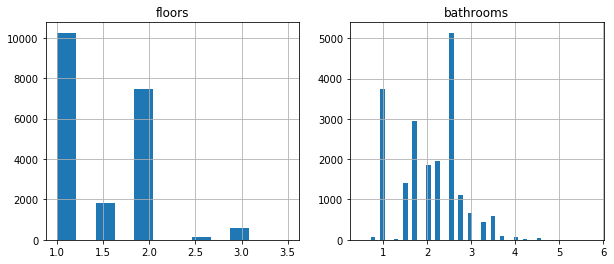

In [300]:
# plotting two histograms
plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
df_subset.floors.hist(bins=12)
ax1.set_title("floors")

ax2 = plt.subplot(1,2,2)
df_subset.bathrooms.hist(bins=50)
ax2.set_title('bathrooms')

Gross. We need to clean that up a little bit.

Since there are a lot of half and quarter (just sinks? just toilets? just showers?) bathrooms, we'll just round every value down to an integer (1.75 intentionally rounds down to 1). It's just a hunch, but it seems like the number of full bathrooms might be more important than the number of partial bathrooms.

We'll go through a similar routine for *floors*, but this time we'll round everything up (1.5 rounds up to 2). Again, just a hunch, but this is based on the assumption that potential buyers would assign similar weights to both full- and half-flights of stairs.

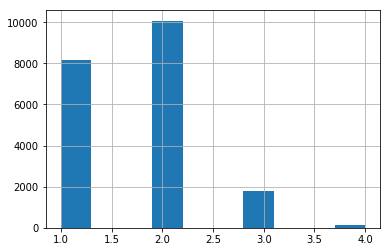

In [301]:
#grouping bathrooms
new_bath = []
for i in df_subset.bathrooms:
    if i >= 1:
        new_bath.append(math.trunc(i))
    else:
        new_bath.append(1)    
df_subset.bathrooms = new_bath

#now to group the outliers into the largest category
def impute_baths(value):
    if value > 4:
        return 4
    else:
        return value


df_subset.bathrooms = df_subset.bathrooms.map(lambda x: impute_baths(x))
df_subset.bathrooms.hist();

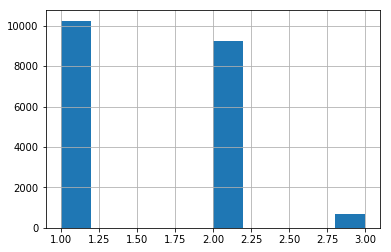

In [302]:
#grouping floors
new_floor = []
for i in df_subset.floors:
    new_floor.append(math.ceil(i))
df_subset.floors = new_floor

#now to group the outliers into the largest category
def impute_floors(value):
    if value > 3:
        return 3
    else:
        return value


df_subset.floors = df_subset.floors.map(lambda x: impute_floors(x))
df_subset.floors.hist();

Let's go ahead and drop those pesky outliers at the end of both groups.

In [303]:
# dropping bathrooms outliers
indexNames = df_subset[df_subset['bathrooms'] == 4 ].index
df_subset.drop(indexNames , inplace=True)
# dropping floors outliers
indexNames = df_subset[df_subset['floors'] == 3 ].index
df_subset.drop(indexNames , inplace=True)

### Double checking to make sure we got them all

To double check, let's graph the histograms again.

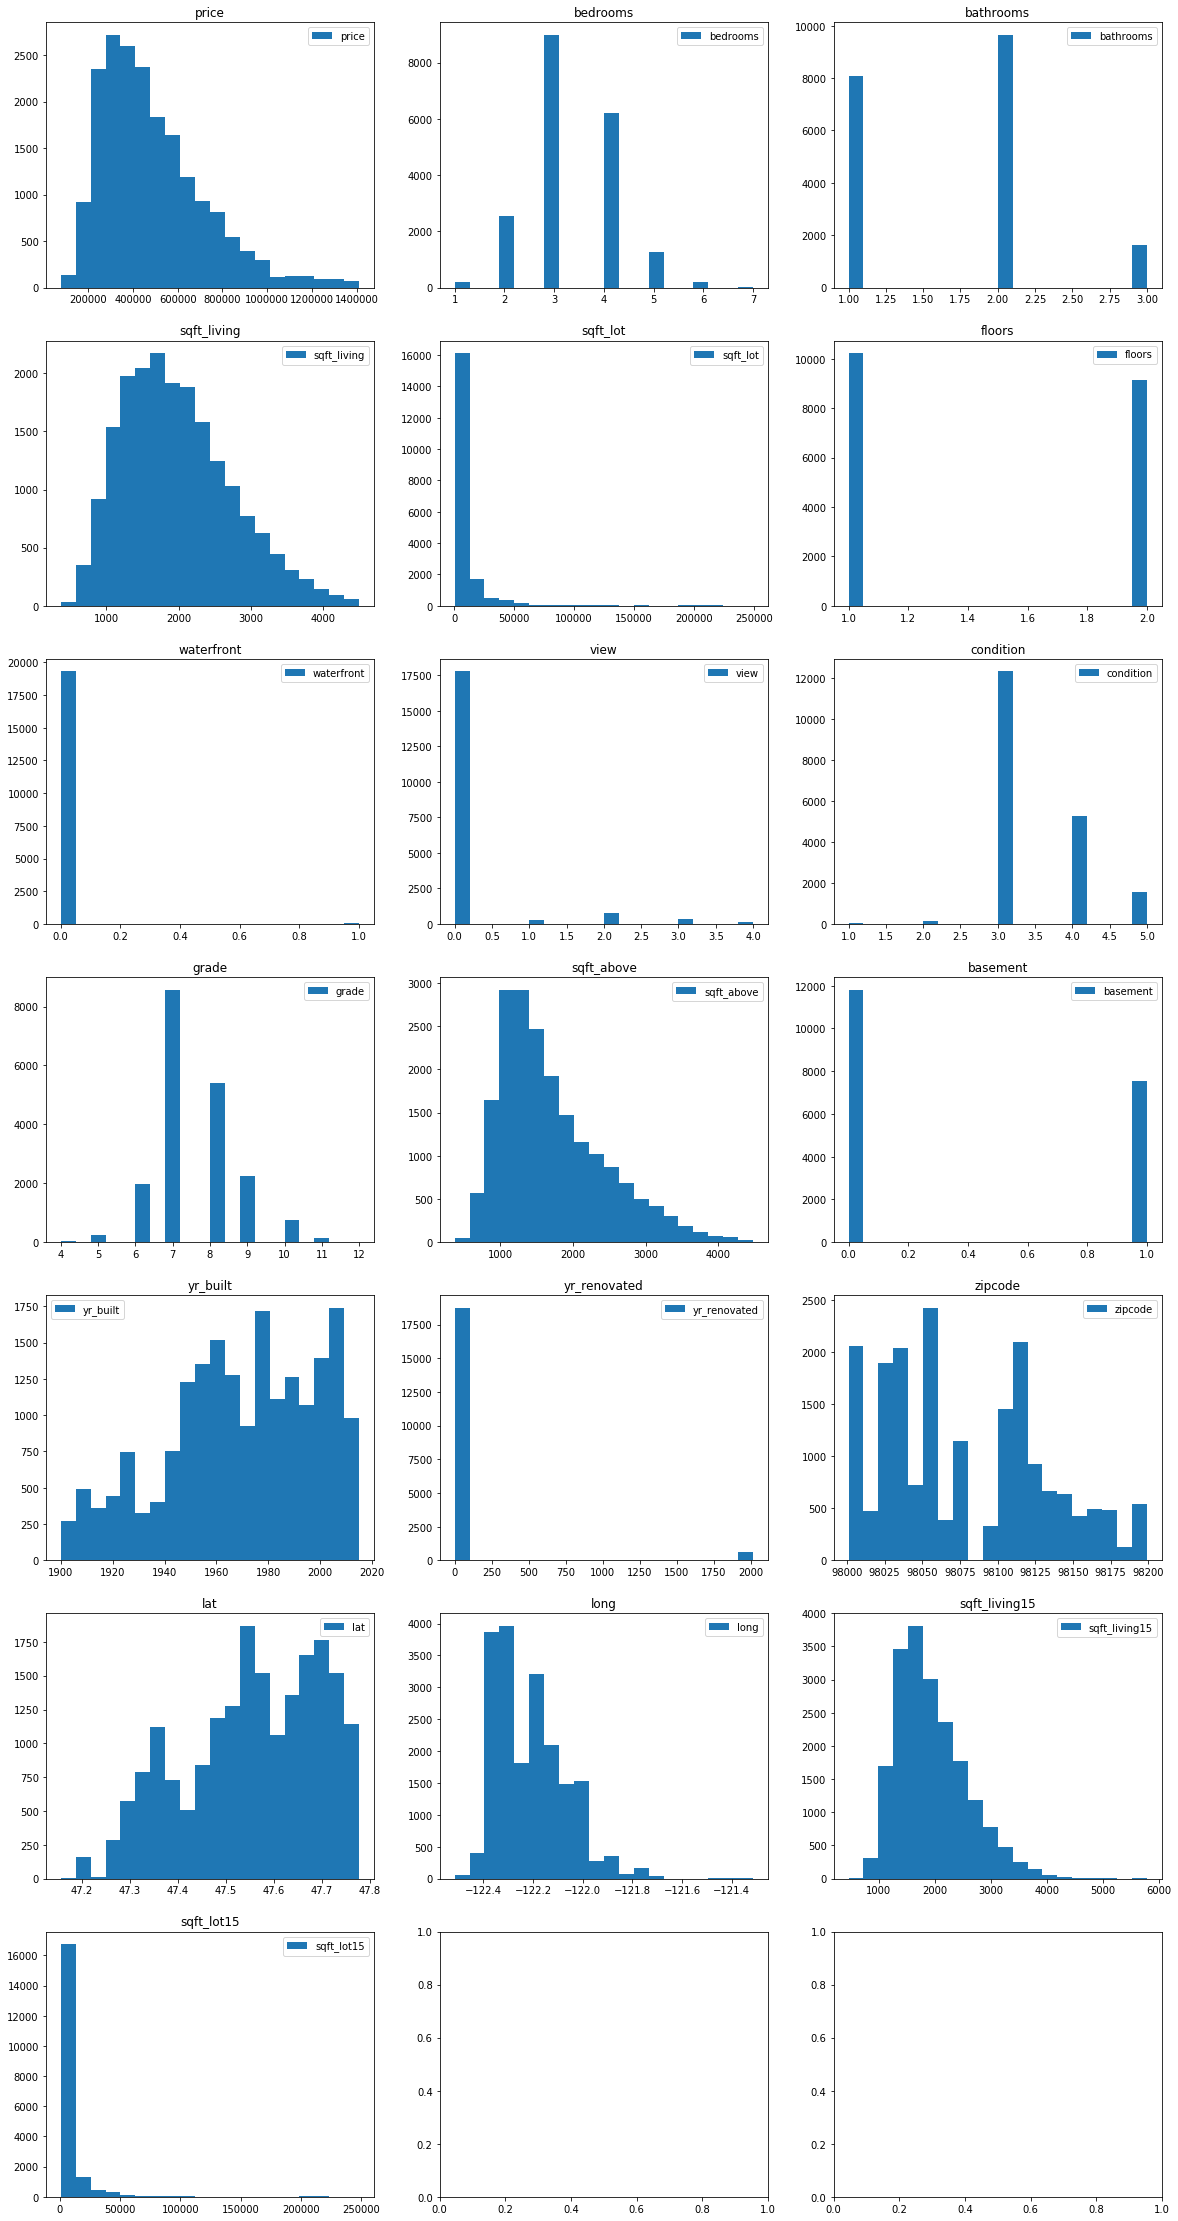

In [304]:
x = df_subset

fig, axs = plt.subplots(7, 3, figsize=(20, 40))

for index, ax in enumerate(axs.flatten()):
    if index < 19:  # to avoid throwing an error
        column = x.columns[index]
        ax.hist(x[column], bins=20)
        ax.set_title(column)
        ax.legend()
plt.show()

That's a lot better, but there are still several which have extreme outliers. Now that our graphs are zoomed in we should be able to estimate a good cut-off point for these variables.

In [308]:
# dropping sqft_lot outliers
indexNames = df_subset[df_subset['sqft_lot'] >= 34000 ].index
df_subset.drop(indexNames , inplace=True)

# dropping sqft_living15 outliers
indexNames = df_subset[df_subset['sqft_living15'] >= 4250 ].index
df_subset.drop(indexNames , inplace=True)

# dropping sqft_lot15 outliers
indexNames = df_subset[df_subset['sqft_lot15'] >= 34000 ].index
df_subset.drop(indexNames , inplace=True)

# dropping price outliers
indexNames = df_subset[df_subset['price'] >= 1275000 ].index
df_subset.drop(indexNames , inplace=True)

## Variable correlation & Feature Selection

Now that we've seen that several of the variables display relationships, and that several independent variables might be related, let's use a correlation heatmap to filter out which ones are related the closest.

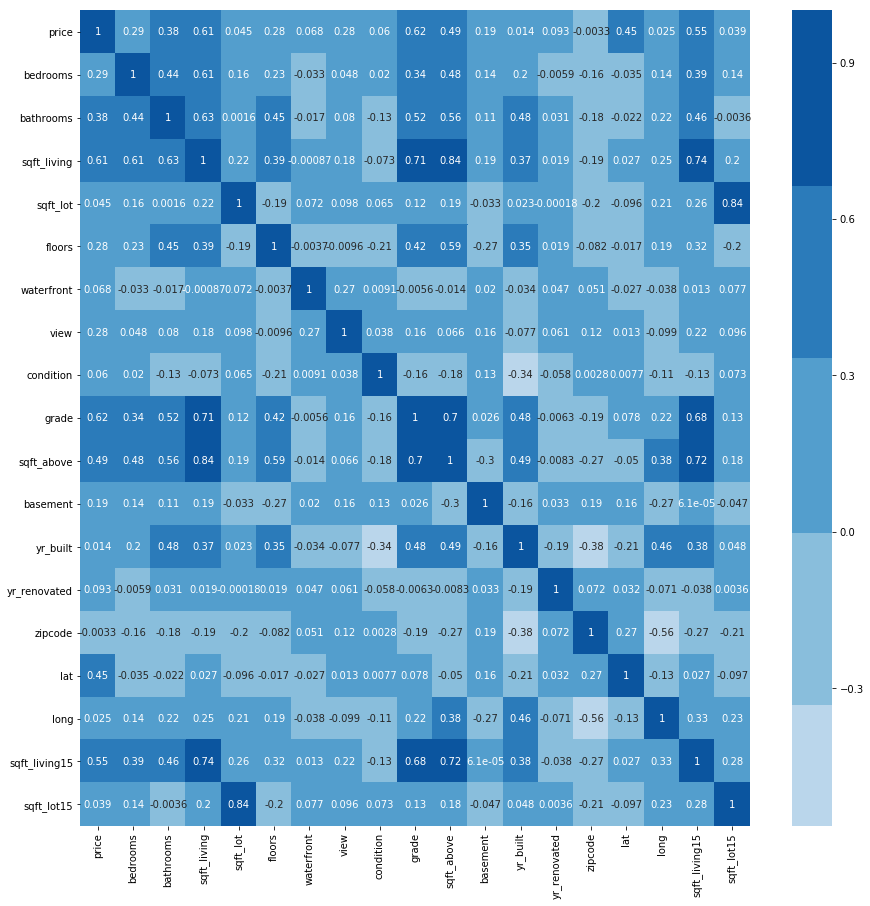

In [311]:
plt.figure(figsize=(15,15))
sns.heatmap(df_subset.corr(), annot=True, cmap=sns.color_palette('Blues'), center=0);

Alright, it looks like we have a lot of variables that are not well-correlated to *price*. Let's drop the ones that have a score lower than 0.1 (except *long*).

In [312]:
# dropping the least relevant variables
df_subset.drop(['sqft_lot','sqft_lot15','condition','yr_built','zipcode','waterfront','yr_renovated'], axis=1, inplace=True)

In [313]:
# defining the function
def ols_iterate(y, x_list, dataset):
    """
    This function iterates through 1:1 OLS model summaries using
    an input target variable and a list of independent variables.
    --------------------
    y = target column name (ex: ['target'])
    x = list of DataFrame columns (ex: ['var1','var2','var3'])
    dataset = name of pd.DataFrame (ex: df)
    
    """
    listed = []
    for i in x_list:
        item = []
        x = dataset[i]
        X = sm.add_constant(x)
        linreg = sm.OLS(dataset[y], X).fit()
        item = [i, round(linreg.rsquared, 4), round(linreg.pvalues[1], 4)]
        listed.append(item)
    print('variable , r-squared , p-value')
    return listed

In [314]:
lerst = list(df_subset.columns)

In [315]:
ols_iterate('price', lerst, df_subset)

variable , r-squared , p-value


[['price', 1.0, 0.0],
 ['bedrooms', 0.0853, 0.0],
 ['bathrooms', 0.144, 0.0],
 ['sqft_living', 0.3696, 0.0],
 ['floors', 0.0794, 0.0],
 ['view', 0.0792, 0.0],
 ['grade', 0.3785, 0.0],
 ['sqft_above', 0.2402, 0.0],
 ['basement', 0.0364, 0.0],
 ['lat', 0.1983, 0.0],
 ['long', 0.0006, 0.001],
 ['sqft_living15', 0.306, 0.0]]

Neat. but we don't care about that for now.

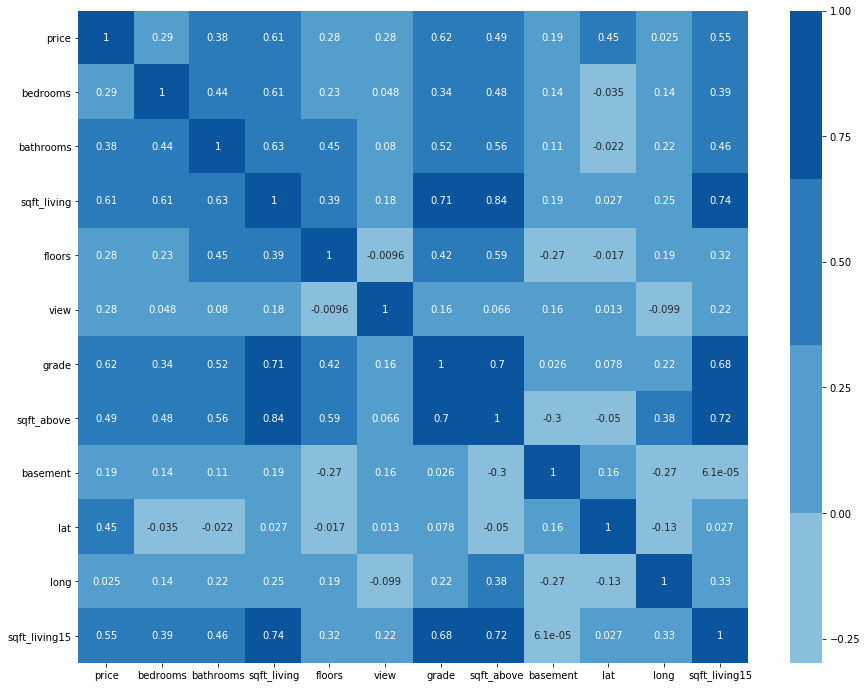

In [316]:
# cleaned up heatmap again
plt.figure(figsize=(15,12))
sns.heatmap(df_subset.corr(), annot=True, cmap=sns.color_palette('Blues'), center=0);

We also seem to have numerous candidates for multicolinearity. Rather than addressing them all right now, let's see if we can pare down our list of variables first. Use *statsmodels* to see which variables have the highest *p-values*.

In [317]:
# split the dependent variable 'price' from the rest of the data
y = df_subset['price']
x = df_subset.drop(['price'], axis=1)

# now run an Ordinary Least Squares model
linreg = sm.OLS(y, x).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.189e+04
Date:                Fri, 31 May 2019   Prob (F-statistic):               0.00
Time:                        19:36:31   Log-Likelihood:            -2.3578e+05
No. Observations:               17806   AIC:                         4.716e+05
Df Residuals:                   17795   BIC:                         4.717e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -9084.9237   1537.787     -5.908      0.000   -1.21e+04   -6070.712
bathrooms     -1.492e+04   2250.852     -6.629      0.000   -1.93e+04   -1.05e+04
sqft_living     103.6370      5.242     19.771      0.000      93.362     113.912
floors         3.524e+04   2739.392     12.863      0.000    2.99e+04    4.06e+04
view           5.562e+04   1695.624     32.805      0.000    5.23e+04    5.89e+04
grade            6.4e+04   1627.753     39.318      0.000    6.08e+04    6.72e+04
sqft_above      -28.0621      5.869     -4.782      0.000     -39.565     -16.559
basement       3.462e+04   4086.308      8.472      0.000    2.66e+04    4.26e+04
lat            5.403e+05   7344.067     73.564      0.000    5.26e+05    5.55e+05
long           2.121e+05   2849.294     74.456      0.000    2.07e+05    2.18e+05
sqft_living15    30.1461      2.861     10.538      0.000      24.539      35.753
==============================================================================
Omnibus:                     2975.997   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6132.997
Skew:                           1.005   Prob(JB):                         0.00
Kurtosis:                       5.056   Cond. No.                     2.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now that we've whittled down our variables a bit, let's take another look at their scatter plots using a *scatter_matrix*.

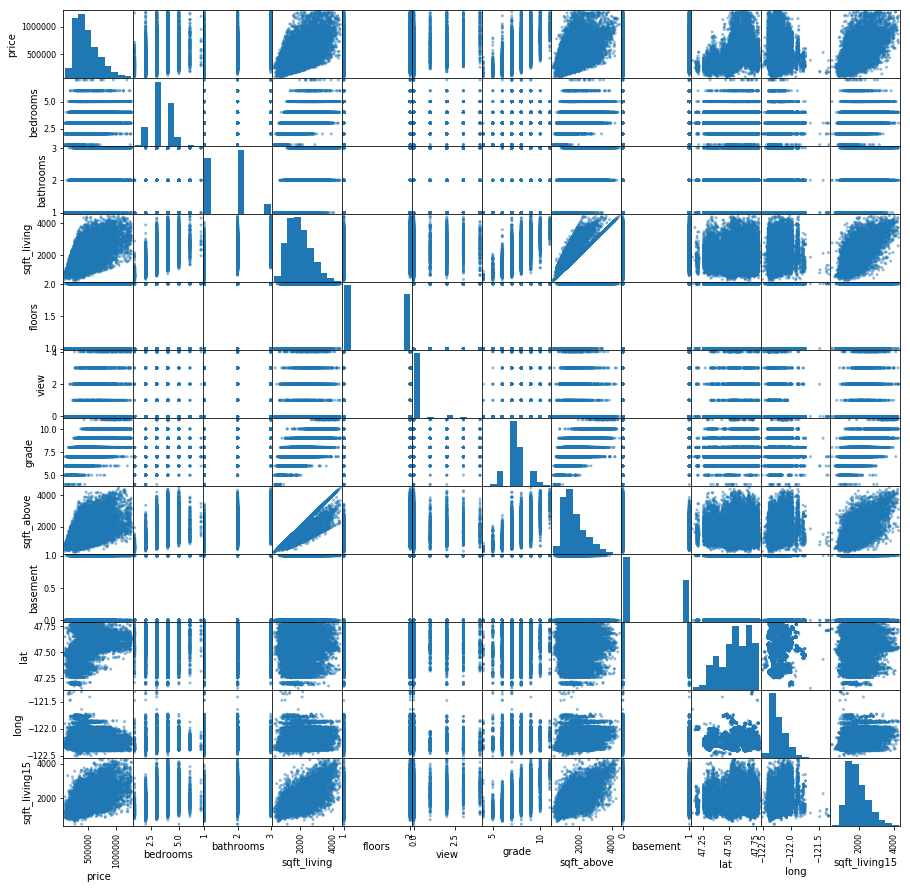

In [318]:
pd.plotting.scatter_matrix(df_subset, figsize=(15,15));

So much nicer! And it appears that half of our remaining variables are categorical in nature, given the vertical/horizontal striations. 
Let's check to see if any of our variables have normally distributed residuals (and thus are likely to have a linear relationship).

## Checking for normality

One of the easiest ways to check a variable in a large dataset for normality of distribution is to do a **Jarque-Bera test** and see what the *skew* and *kurtosis* scores are. Generally, normal distribution has a skew < 1 and a kurtosis < 6. The JB score should 

In [319]:
def JB_iterate(y, x_list, dataset):
    """
    This function iterates through 1:1 OLS model summaries using
    an input target variable and a list of independent variables.
    --------------------
    y = target column name (ex: ['target'])
    x = list of DataFrame columns (ex: ['var1','var2','var3'])
    dataset = name of pd.DataFrame (ex: df)
    
    """
    name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
    for i in x_list:
        f = str('price~'+i)
        model = smf.ols(formula=f, data=dataset).fit()
        test = sms.jarque_bera(model.resid)
        print(i,' : \n',list(zip(name, test)),'\n')
    pass

In [320]:
y = df_subset.price
x = list(df_subset.drop('price', axis=1).columns)

JB_iterate(y, x, df_subset)

bedrooms  : 
 [('Jarque-Bera', 2986.1960092104573), ('Prob', 0.0), ('Skew', 0.923928174763087), ('Kurtosis', 3.7812822001002546)] 

bathrooms  : 
 [('Jarque-Bera', 2785.5367129948263), ('Prob', 0.0), ('Skew', 0.8954919144736889), ('Kurtosis', 3.739520923021502)] 

sqft_living  : 
 [('Jarque-Bera', 2033.1079080187685), ('Prob', 0.0), ('Skew', 0.7267516661985467), ('Kurtosis', 3.7922584428385977)] 

floors  : 
 [('Jarque-Bera', 3208.350534401685), ('Prob', 0.0), ('Skew', 0.9524967838875025), ('Kurtosis', 3.833911104449092)] 

view  : 
 [('Jarque-Bera', 2929.2573572170263), ('Prob', 0.0), ('Skew', 0.9228856624177662), ('Kurtosis', 3.7357702318928996)] 

grade  : 
 [('Jarque-Bera', 2696.754066651813), ('Prob', 0.0), ('Skew', 0.8110853182930219), ('Kurtosis', 4.001703596431078)] 

sqft_above  : 
 [('Jarque-Bera', 2843.467471070415), ('Prob', 0.0), ('Skew', 0.8796614706864136), ('Kurtosis', 3.8587081147999367)] 

basement  : 
 [('Jarque-Bera', 3455.297198788898), ('Prob', 0.0), ('Skew', 1.00

It would appear that none of our variables are normally distributed. These scores suggest that the residuals of each variable are rather positively-skewed and have heavy tails (most of the data are within 3.7-4.4 standard deviations of their mean). This means that we do *not* have any linear relationships just yet. We will need to do a little more manipulation.

## *lat* & *long*

But what about the *lat* and *long* data? Let's check out their histograms.

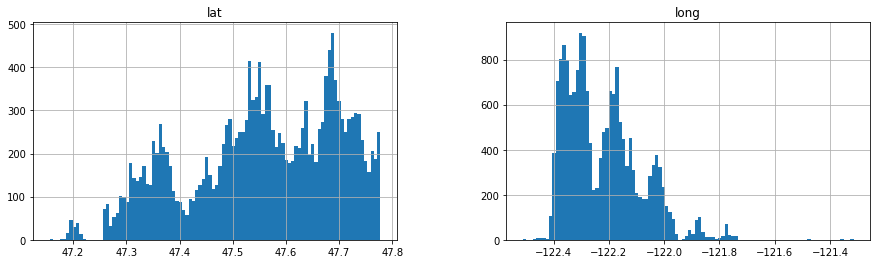

In [323]:
df_subset.hist(column=['lat','long'], bins=100, figsize=(15,4));

#### hexbins

The distribution is somewhat erratic, though there are hints of a more normal distribution underlying the irregularities. Let's use **hexbins** to see what this looks like in 2D.

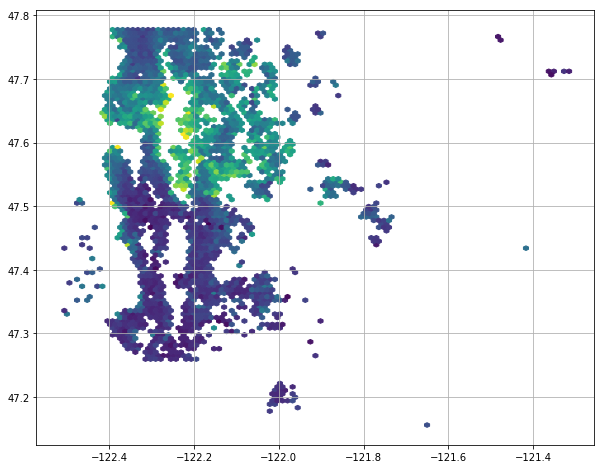

In [322]:
plt.figure(figsize=(10,8))
plt.grid()
plt.hexbin(df_subset.long, df_subset.lat, C=df_subset.price)
plt.show()

A quick look at Seattle on a map ( https://www.google.com/maps/@47.5285014,-122.3593406,10.36z ) shows that there are mountains, islands, and lakes scattered throughout this region. Let's narrow our dataset a bit to get rid of the outlier houses.

How about we cut out anything East of -121.975, anything West of -122.425, and anything South of 47.275. That won't make it perfect, but it should at least eliminate properties in the mountains or ones only accessible by ferries.

In [324]:
# cutting off the eastern suburbs and farmland
indexNames = df_subset[df_subset['long'] > -121.975 ].index
df_subset.drop(indexNames , inplace=True)

# cutting off the western island
indexNames = df_subset[df_subset['long'] < -122.425 ].index
df_subset.drop(indexNames , inplace=True)

# cutting off the southern end
indexNames = df_subset[df_subset['lat'] < 47.275 ].index
df_subset.drop(indexNames , inplace=True)

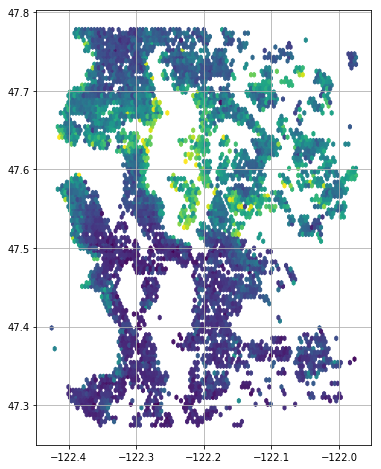

In [325]:
plt.figure(figsize=(6,8))
plt.grid()
plt.hexbin(df_subset.long, df_subset.lat, C=df_subset.price)
plt.show()

This looks better, but there's not much more that we can do with it without better observations. The *waterfront* variable would have been useful if half of the observations weren't missing. As such, we'll just have to refer realtors (or whoever is using this data) to this map to take it into account when looking at pricing of houses.

In [118]:
# We can also make our graphs look prettier now
plt.style.use('seaborn')

# Normalizing, standardizing, scaling, etc.

We still need to tweak the variables with large values to make them a bit more manageable. Let's look at how correlated these variables might be, and then try a variety of standardization methods.

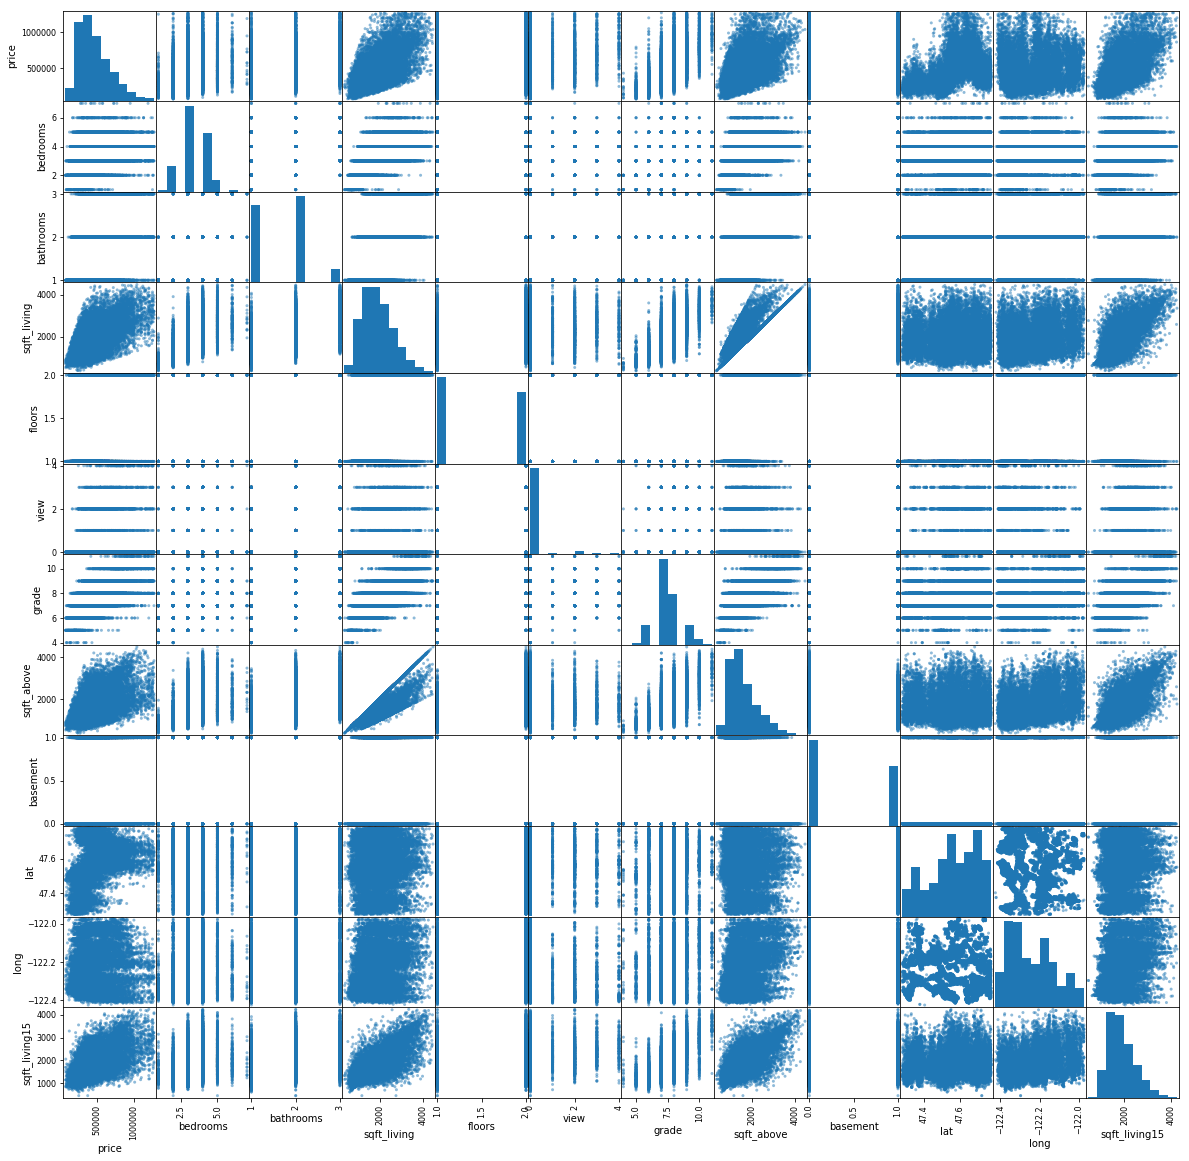

In [326]:
pd.plotting.scatter_matrix(df_subset,figsize  = [20,20]);

We still have quite a few histograms that are positively-skewed. Let's run a **log-transformation** to see if we can make them more normally-distributed.

In [327]:
# creating a new DataFrame for log-transformations
df_sub_log = pd.DataFrame([])
df_sub_log['sqft_living'] = np.log(df_subset['sqft_living'])
df_sub_log['sqft_above'] = np.log(df_subset['sqft_above'])
df_sub_log['bedrooms'] = np.log(df_subset['bedrooms'])
df_sub_log['sqft_living15'] = np.log(df_subset['sqft_living15'])

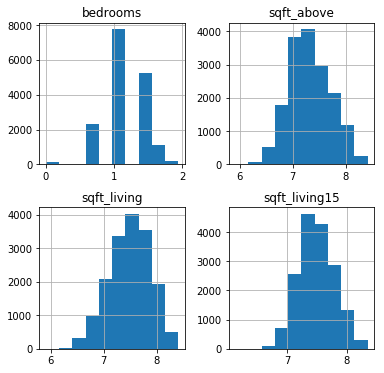

In [328]:
df_sub_log.hist(figsize  = [6, 6]);

Good. Now let's standardize/scale many of the variables. Given the normal distribution, perhaps **mean normalization** would be worthwhile for the log-transformed ones. For things like *lat* and *long*, **min-max scaling** is likely to be more useful.

In [329]:
df_subset.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'grade', 'sqft_above', 'basement', 'lat', 'long', 'sqft_living15'],
      dtype='object')

In [330]:
df_sub_log_scaled = pd.DataFrame([])
for column in df_sub_log.columns:
    G = df_sub_log[column]
    df_sub_log_scaled[column] = (G-np.mean(G)) / (max(G)-min(G))

# and doing the same for 'grade'
G = df_subset['grade']
df_sub_log_scaled['grade'] = (G-np.mean(G)) / (max(G)-min(G))

# min-max scaling some other variables
G = df_subset['lat']
df_sub_log_scaled['lat'] = (G-min(G))/(max(G)-min(G))
G = df_subset['long']
df_sub_log_scaled['long'] = (G-min(G))/(max(G)-min(G))

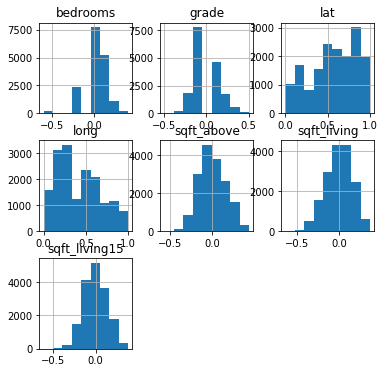

In [331]:
# display the histograms to double check results
df_sub_log_scaled.hist(bins=9, figsize  = [6, 6]);

Now create a new DataFrame that combines these new values with the variables that did not undergo any transformations.

In [332]:
df_scaled = df_subset
for column in df_sub_log_scaled.columns:
    df_scaled[column] = df_sub_log_scaled[column]

Now let's build a linear regression model again and see what we have.

In [333]:
y = df_scaled['price']
x = df_scaled.drop(['price'], axis=1)
linreg = sm.OLS(y, x).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.957e+04
Date:                Fri, 31 May 2019   Prob (F-statistic):               0.00
Time:                        19:46:40   Log-Likelihood:            -2.2287e+05
No. Observations:               16787   AIC:                         4.458e+05
Df Residuals:                   16776   BIC:                         4.458e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -5.647e+04   1.02e+04     -5.541      0.000   -7.64e+04   -3.65e+04
bathrooms      4.106e+04   2176.879     18.863      0.000    3.68e+04    4.53e+04
sqft_living    1.069e+05    2.7e+04      3.956      0.000    5.39e+04     1.6e+05
floors         8.573e+04   2495.507     34.355      0.000    8.08e+04    9.06e+04
view           6.246e+04   1808.925     34.528      0.000    5.89e+04     6.6e+04
grade          3.619e+05   1.18e+04     30.706      0.000    3.39e+05    3.85e+05
sqft_above     7.436e+04    2.8e+04      2.654      0.008    1.94e+04    1.29e+05
basement       6.741e+04   4630.173     14.559      0.000    5.83e+04    7.65e+04
lat            3.929e+05   3833.272    102.498      0.000    3.85e+05       4e+05
long           3.292e+04   4589.469      7.172      0.000    2.39e+04    4.19e+04
sqft_living15  2.077e+05   1.28e+04     16.236      0.000    1.83e+05    2.33e+05
==============================================================================
Omnibus:                     1467.357   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2503.846
Skew:                           0.636   Prob(JB):                         0.00
Kurtosis:                       4.400   Cond. No.                         84.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Now to start addressing multicollinearity!

Let's look at a heatmap again to determine where multicollinearities might exist.

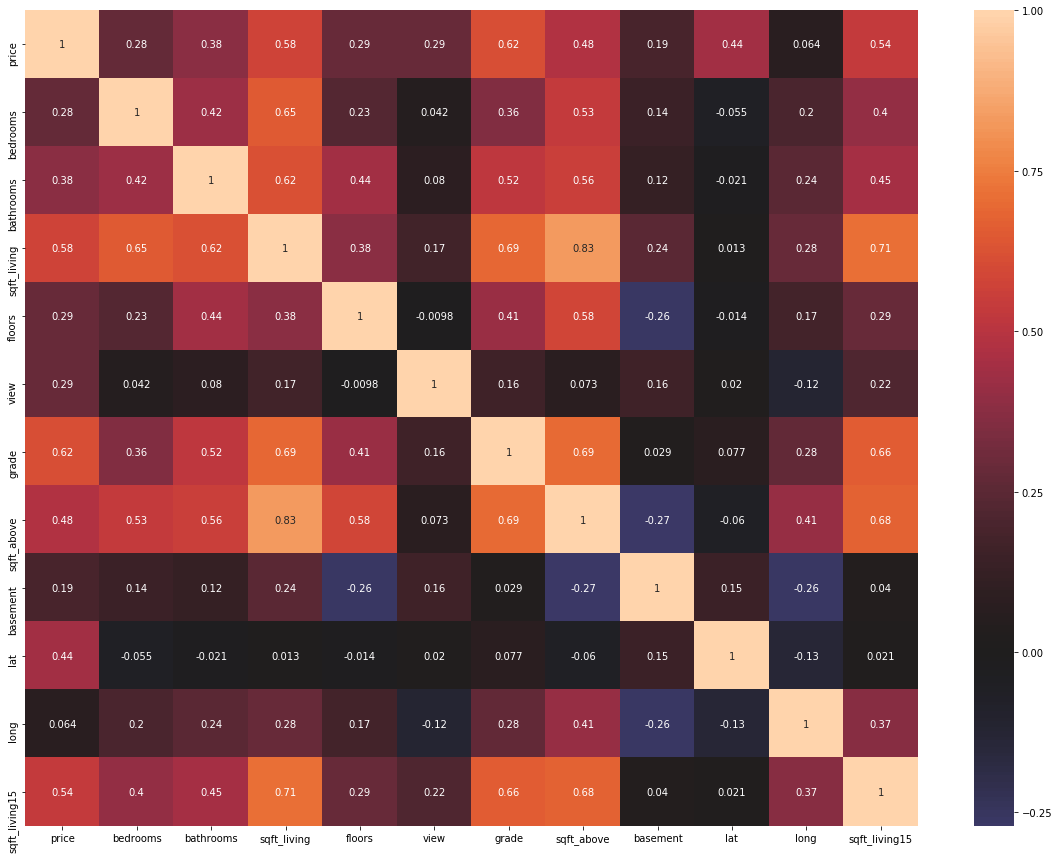

In [334]:
plt.figure(figsize=(20,15))
sns.heatmap(df_scaled.corr(), center=0, annot=True);

According to this heatmap, it looks like there are a couple groups of collinearities ( > 0.65):
1. ***sqft_living***: *grade*, *sqft_above*, *sqft_living15*, *bathrooms*

The variable *bathrooms* almost makes the threshold for entry into this group, so we'll just push it in to see what happens.
The variable *grade*, however, is really an unknown quantity (who knows what goes into it?), so we'll keep it separate for now.

Right off the bat, we can logically get rid of *sqft_living15* because most houses in a neighborhood will tend to be of similar sizes, so this is an obvious collinearity. Therefore let's drop *sqft_living15* from our model.

In [335]:
df_scaled.drop(['sqft_living15'], axis=1, inplace=True)

Also, *grade* might be better suited as a categorical variable, so we'll not deal with it until later on.

So let's examine our continuous data first for potential collinearity. We can do this easily using a heatmap to display the pairwise correlation scores between the variables.

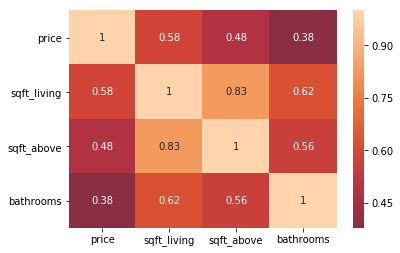

In [341]:
# slice just the variables we want to compare
df_sub_continuous = df_scaled[['price','sqft_living','sqft_above','bathrooms']]

# make a heatmap of the correlation
sns.heatmap(df_sub_continuous.corr(), center=0, annot=True);

It looks like they are all pretty heavily correlated, with the most interrelated appearing in the top left and becoming less related the further out we travel.

### Building a feature builder

Let's build a function that can take in two variables, a target ('price'), and a dataset to create a feature for our dataset, outputting a column of coefficients to our dataset for the new feature.

In [342]:
# building a feature building function. what fun!
def feature_builder(var_1, var_2, target, dataset):
    """
    Parameters :
    ------------
    var_1 : column name of first potentially correlated variable
    var_2 : column name of second potentially correlated variable
    target : column name of target variable
    dataset : name of pandas DataFrame
    
    
    """    
    weights = np.linspace(0, 1, 10000)
    max_corr = -1
    best_weights = None
    corrs = []
    
    for index, weight in enumerate(weights):
        w1 = weight # get the first weight value
        w2 = 1 - weight # get the second weight value
        vals = w1*dataset[var_1] + w2*dataset[var_2] # create a linear combination of the columns
        corr_coeff = np.abs(np.corrcoef(vals, dataset[target]))[0][1] # get the corrcoeff with the target
        
        # if the corr_coeff is larger than the max, store the weights and change the max
        if corr_coeff > max_corr:
            best_weights = [w1, w2]
            max_corr = corr_coeff
            
        # store the correlation coefficients to a list
        corrs.append(corr_coeff)  
        
    # output the desired weights
    print('weight for [',var_1,'] : weight for [',var_2,']\n', best_weights)
    feat_label = str(var_1+'_'+var_2+'_feature')
    print('feature name : ', feat_label)
    dataset[feat_label] = w1*dataset[var_1] + w2*dataset[var_2]
    pass

In [343]:
# now to run the function on our small dataset
feature_builder('sqft_living','sqft_above','price',df_sub_continuous)

weight for [ sqft_living ] : weight for [ sqft_above ]
 [0.9832983298329834, 0.016701670167016625]
feature name :  sqft_living_sqft_above_feature


C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [344]:
# let's take a look at our new and improved small dataset
df_sub_continuous.head()

,price,sqft_living,sqft_above,bathrooms,sqft_living_sqft_above_feature
index,,,,,
0,221900.0,-0.166240,-0.099794,1,-0.166240
1,538000.0,0.146021,0.144599,2,0.146021
2,180000.0,-0.337487,-0.271042,1,-0.337487
3,604000.0,0.037322,-0.146620,3,0.037322
4,510000.0,-0.024517,0.041928,2,-0.024517


#### Evaluating our new feature

Now that we've created two potentially useful features, let's see how they might effect our model. To do so, we'll run three OLS models and compare their scores.

In [345]:
y = df_sub_continuous['price']

# original variables, untouched
x1 = df_sub_continuous[['sqft_living','sqft_above','bathrooms']]

# our first feature with the remaining original variables
x2 = df_sub_continuous[['sqft_living_sqft_above_feature','bathrooms']]

# modeling and summarizing the first option (original)
linreg = sm.OLS(y, x1).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                 2.600e+04
Date:                Fri, 31 May 2019   Prob (F-statistic):               0.00
Time:                        19:51:30   Log-Likelihood:            -2.3039e+05
No. Observations:               16787   AIC:                         4.608e+05
Df Residuals:                   16784   BIC:                         4.608e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living  2.848e+05   1.98e+04     14.410      0.000    2.46e+05    3.24e+05
sqft_above  -1.553e+05   1.95e+04     -7.961      0.000   -1.94e+05   -1.17e+05
bathrooms    2.687e+05    998.255    269.181      0.000    2.67e+05    2.71e+05
==============================================================================
Omnibus:                      386.933   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.530
Skew:                           0.347   Prob(JB):                     3.25e-94
Kurtosis:                       3.364   Cond. No.                         27.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [346]:
# modeling and summarizing the second option (midway point)
linreg = sm.OLS(y, x2).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                 3.883e+04
Date:                Fri, 31 May 2019   Prob (F-statistic):               0.00
Time:                        19:52:08   Log-Likelihood:            -2.3042e+05
No. Observations:               16787   AIC:                         4.608e+05
Df Residuals:                   16785   BIC:                         4.609e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
sqft_living_sqft_above_feature  1.555e+05   1.13e+04     13.788      0.000    1.33e+05    1.78e+05
bathrooms                       2.685e+05    999.590    268.566      0.000    2.66e+05     2.7e+05
==============================================================================
Omnibus:                      384.863   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              424.406
Skew:                           0.351   Prob(JB):                     6.94e-93
Kurtosis:                       3.338   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation

Looking at these summaries in sequence, it seems that the **F-statistic**, **Skew**, **Kurtosis**, and **Cond. No.** have all consistently improved as we progressed through this process, even though the last iteration slightly increased the skew and kurtosis. Our **R-squared** score has fallen a little bit, but that's to be expected when getting rid of multicollinearity. 

### Plugging this back into the larger dataset

In [347]:
df_scaled['sqft_living_sqft_above_feature'] = df_sub_continuous['sqft_living_sqft_above_feature']

# since we're about to remove columns, let's create a new DataFrame
df_sub_feats = df_scaled.drop(['sqft_living','sqft_above'], axis=1)
df_sub_feats.head()

,price,bedrooms,bathrooms,floors,view,grade,basement,lat,long,sqft_living_sqft_above_feature
index,,,,,,,,,,
0,221900.0,-0.032876,1,1,0.0,-0.066591,0,0.469956,0.373333,-0.166240
1,538000.0,-0.032876,2,2,0.0,-0.066591,1,0.887386,0.235556,0.146021
2,180000.0,-0.241243,1,1,0.0,-0.209448,0,0.921011,0.426667,-0.337487
3,604000.0,0.114964,3,1,0.0,-0.066591,1,0.489057,0.071111,0.037322
4,510000.0,-0.032876,2,1,0.0,0.076266,0,0.680064,0.844444,-0.024517


In [348]:
y = df_sub_feats['price']
x = df_sub_feats.drop(['price'], axis=1)

linreg = sm.OLS(y, x).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 2.350e+04
Date:                Fri, 31 May 2019   Prob (F-statistic):               0.00
Time:                        19:52:29   Log-Likelihood:            -2.2300e+05
No. Observations:               16787   AIC:                         4.460e+05
Df Residuals:                   16778   BIC:                         4.461e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
bedrooms                       -6.686e+04   1.03e+04     -6.520      0.000    -8.7e+04   -4.68e+04
bathrooms                       4.021e+04   2192.719     18.340      0.000    3.59e+04    4.45e+04
floors                          8.459e+04   2292.312     36.900      0.000    8.01e+04    8.91e+04
view                            6.755e+04   1794.055     37.652      0.000     6.4e+04    7.11e+04
grade                            4.23e+05   1.12e+04     37.891      0.000    4.01e+05    4.45e+05
basement                        5.197e+04   2522.991     20.597      0.000     4.7e+04    5.69e+04
lat                             3.943e+05   3861.579    102.120      0.000    3.87e+05    4.02e+05
long                            5.153e+04   4487.908     11.483      0.000    4.27e+04    6.03e+04
sqft_living_sqft_above_feature  2.682e+05   1.29e+04     20.859      0.000    2.43e+05    2.93e+05
==============================================================================
Omnibus:                     1670.008   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3021.945
Skew:                           0.685   Prob(JB):                         0.00
Kurtosis:                       4.564   Cond. No.                         36.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

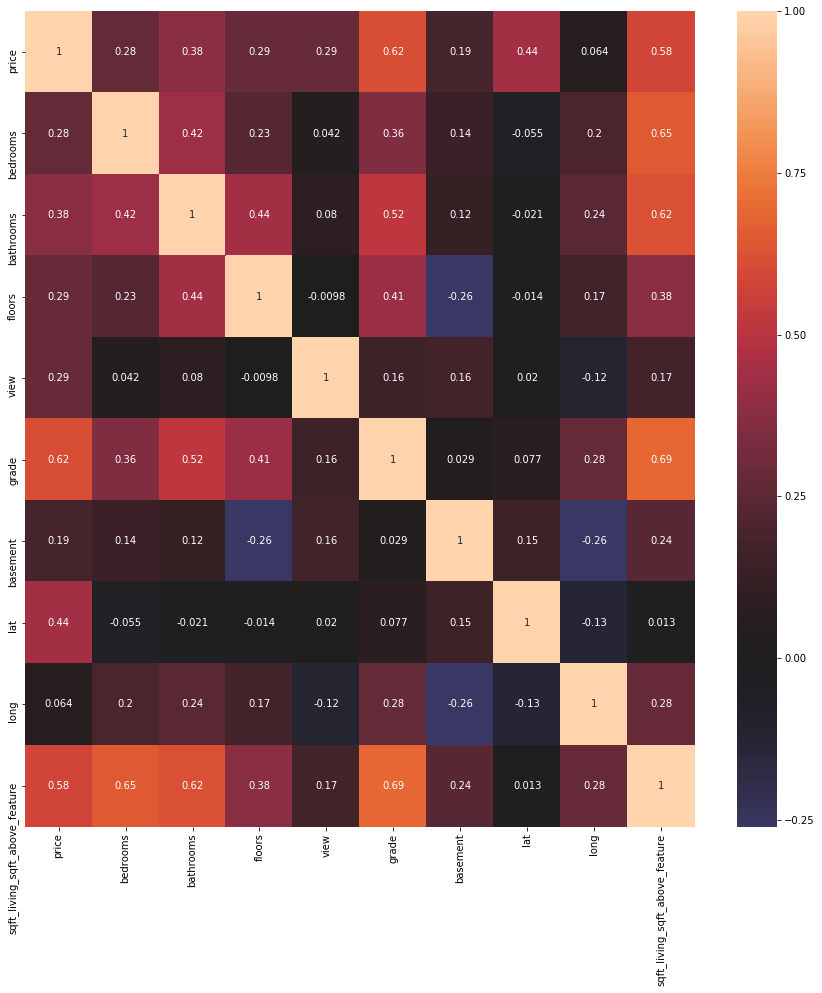

In [349]:
plt.figure(figsize=(15,15))
sns.heatmap(df_sub_feats.corr(), center=0, annot=True);

## Feature Selection

Let's use **stepwise selection** and **feature ranking with recursive elimination** to see which features we should keep from our refined dataset.

In [350]:
# code provided by Section 8 lesson

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [352]:
# now run our dataset through the function
y = df_sub_feats['price']
x = df_sub_feats.drop(['price'], axis=1)

result = stepwise_selection(x, y, verbose = True)
print('resulting features:')
print(result)

Add  floors                         with p-value 0.0
Add  bathrooms                      with p-value 0.0
Add  sqft_living_sqft_above_feature with p-value 0.0
Drop bathrooms                      with p-value 0.218496
Add  lat                            with p-value 0.0
Add  grade                          with p-value 0.0


C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  view                           with p-value 6.37439e-279
Add  long                           with p-value 5.6639e-23
Add  bedrooms                       with p-value 2.30205e-13
Add  basement                       with p-value 0.000633669
resulting features:
['floors', 'sqft_living_sqft_above_feature', 'lat', 'grade', 'view', 'long', 'bedrooms', 'basement']


***So*** this process asks us to eliminate *basement*. That's fine. Let's see what OLS says without it.

In [170]:
df_stepped = df_sub_feats[['price','floors', 'bathrooms', 'sqft_living_sqft_above_feature', 
                           'lat', 'view', 'grade', 'long', 'bedrooms']]

y = df_stepped['price']
x = df_stepped.drop(['price'], axis=1)

linreg = sm.OLS(y, x).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 2.496e+04
Date:                Fri, 31 May 2019   Prob (F-statistic):               0.00
Time:                        18:09:46   Log-Likelihood:            -2.4442e+05
No. Observations:               18215   AIC:                         4.889e+05
Df Residuals:                   18207   BIC:                         4.889e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
floors                          7.014e+04   2454.591     28.575      0.000    6.53e+04     7.5e+04
bathrooms                       6.971e+04   2239.573     31.127      0.000    6.53e+04    7.41e+04
sqft_living_sqft_above_feature  3.883e+05   1.58e+04     24.537      0.000    3.57e+05    4.19e+05
lat                             4.266e+05   4001.775    106.611      0.000    4.19e+05    4.34e+05
view                             8.29e+04   1846.249     44.900      0.000    7.93e+04    8.65e+04
grade                            5.13e+05   1.31e+04     39.072      0.000    4.87e+05    5.39e+05
long                            2.872e+04   4727.527      6.075      0.000    1.95e+04     3.8e+04
bedrooms                       -9.081e+04   1.13e+04     -8.063      0.000   -1.13e+05   -6.87e+04
==============================================================================
Omnibus:                     3263.575   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9129.228
Skew:                           0.958   Prob(JB):                         0.00
Kurtosis:                       5.891   Cond. No.                         39.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Not bad; there were only modest improvements in a few scores, but no scores got worse. Thus, we are safe to eliminate *basement* from our model.

Now let's try out **feature ranking with recursive elimination** to see if we can tighten things up a little bit. 

In [231]:
#from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE

y = df_stepped['price']
x = df_stepped.drop(['price'], axis=1)

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 6)
selector = selector.fit(x, y)

In [232]:
selector.support_

array([False, False,  True,  True,  True,  True,  True,  True])

In [233]:
selector.ranking_

array([2, 3, 1, 1, 1, 1, 1, 1])

In [234]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[617160.31882143 324246.5001112   66068.90366456 713034.40065165
 -57718.71127966 -83717.09816269]
328948.580921459


In [235]:
feats_array = np.array(x.columns)
zipped = set(zip(selector.ranking_, feats_array))
five_feats = []
for i, name in zipped:
    if i==1:
        five_feats.append(name)

five_feats

['lat', 'view', 'long', 'bedrooms', 'sqft_living_sqft_above_feature', 'grade']

In [236]:
df_elim = df_stepped[['price','lat', 'view', 'long', 'bedrooms', 'sqft_living_sqft_above_feature', 'grade']]

In [237]:
y = df_elim['price']
x = df_elim.drop(['price'], axis=1)

linreg = sm.OLS(y, x).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 2.553e+04
Date:                Fri, 31 May 2019   Prob (F-statistic):               0.00
Time:                        18:46:42   Log-Likelihood:            -2.4661e+05
No. Observations:               18215   AIC:                         4.932e+05
Df Residuals:                   18209   BIC:                         4.933e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
lat                             6.123e+05   3391.602    180.522      0.000    6.06e+05    6.19e+05
view                            1.007e+05   2057.638     48.944      0.000    9.67e+04    1.05e+05
long                            2.321e+05   4214.603     55.060      0.000    2.24e+05     2.4e+05
bedrooms                       -3.702e+04   1.27e+04     -2.925      0.003   -6.18e+04   -1.22e+04
sqft_living_sqft_above_feature   4.93e+05   1.75e+04     28.130      0.000    4.59e+05    5.27e+05
grade                           5.357e+05   1.48e+04     36.230      0.000    5.07e+05    5.65e+05
==============================================================================
Omnibus:                     1397.724   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2944.656
Skew:                           0.510   Prob(JB):                         0.00
Kurtosis:                       4.685   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

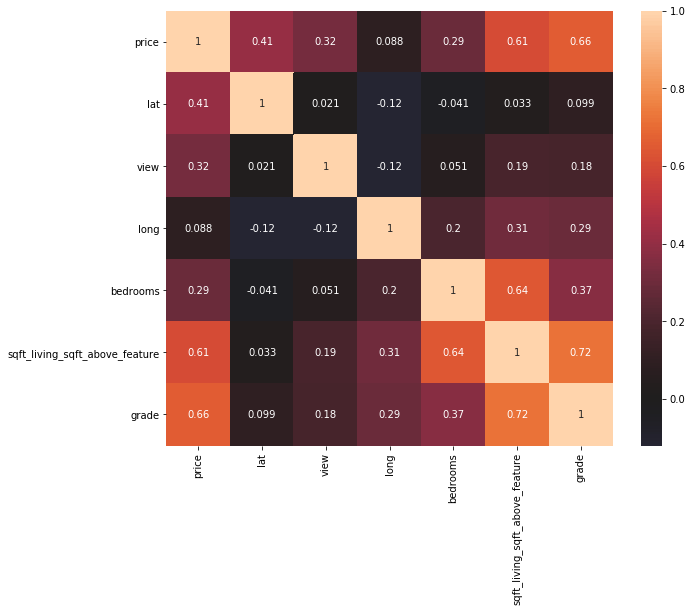

In [238]:
plt.figure(figsize=(10,8))
sns.heatmap(df_elim.corr(), center=0, annot=True);

Well, it looks like that's about as good as it's going to get with these techniques.

### Can we build a super-feature?

We've apparently still got some degree of multicollinearity between our custom feature, *grade*, and *bedrooms*; let's see what happens if we build a custom super-feature, comparing the iterations throughout the building process.

In [239]:
super_feat = pd.DataFrame([])
super_feat = df_elim

In [240]:
super_feat.columns

Index(['price', 'lat', 'view', 'long', 'bedrooms',
       'sqft_living_sqft_above_feature', 'grade'],
      dtype='object')

In [241]:
feature_builder('grade','sqft_living_sqft_above_feature', 'price', super_feat)

weight for [ grade ] : weight for [ sqft_living_sqft_above_feature ]
 [0.6206620662066207, 0.3793379337933793]
feature name :  grade_sqft_living_sqft_above_feature_feature


C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [242]:
feature_builder('grade_sqft_living_sqft_above_feature_feature','bedrooms','price',super_feat)

weight for [ grade_sqft_living_sqft_above_feature_feature ] : weight for [ bedrooms ]
 [0.9158915891589159, 0.08410841084108411]
feature name :  grade_sqft_living_sqft_above_feature_feature_bedrooms_feature


In [243]:
y = super_feat['price']

# no changes
x1 = super_feat[['lat', 'long', 'view', 'bedrooms', 'sqft_living_sqft_above_feature', 'grade']]

# one combination
x2 = super_feat[['lat', 'long', 'view', 'bedrooms', 'grade_sqft_living_sqft_above_feature_feature']]

# super feature
x3 = super_feat[['lat', 'long', 'view', 'grade_sqft_living_sqft_above_feature_feature_bedrooms_feature']]



linreg = sm.OLS(y, x1).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 2.553e+04
Date:                Fri, 31 May 2019   Prob (F-statistic):               0.00
Time:                        18:48:05   Log-Likelihood:            -2.4661e+05
No. Observations:               18215   AIC:                         4.932e+05
Df Residuals:                   18209   BIC:                         4.933e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
lat                             6.123e+05   3391.602    180.522      0.000    6.06e+05    6.19e+05
long                            2.321e+05   4214.603     55.060      0.000    2.24e+05     2.4e+05
view                            1.007e+05   2057.638     48.944      0.000    9.67e+04    1.05e+05
bedrooms                       -3.702e+04   1.27e+04     -2.925      0.003   -6.18e+04   -1.22e+04
sqft_living_sqft_above_feature   4.93e+05   1.75e+04     28.130      0.000    4.59e+05    5.27e+05
grade                           5.357e+05   1.48e+04     36.230      0.000    5.07e+05    5.65e+05
==============================================================================
Omnibus:                     1397.724   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2944.656
Skew:                           0.510   Prob(JB):                         0.00
Kurtosis:                       4.685   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
linreg = sm.OLS(y, x2).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                 2.920e+04
Date:                Fri, 31 May 2019   Prob (F-statistic):               0.00
Time:                        18:48:16   Log-Likelihood:            -2.4700e+05
No. Observations:               18215   AIC:                         4.940e+05
Df Residuals:                   18210   BIC:                         4.940e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
lat                                           6.034e+05   3449.530    174.930      0.000    5.97e+05     6.1e+05
long                                          2.431e+05   4286.365     56.715      0.000    2.35e+05    2.52e+05
view                                          1.081e+05   2084.541     51.865      0.000    1.04e+05    1.12e+05
bedrooms                                      1.712e+05   1.05e+04     16.326      0.000    1.51e+05    1.92e+05
grade_sqft_living_sqft_above_feature_feature   8.11e+05   1.13e+04     71.614      0.000    7.89e+05    8.33e+05
==============================================================================
Omnibus:                     1563.948   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3245.107
Skew:                           0.566   Prob(JB):                         0.00
Kurtosis:                       4.730   Cond. No.                         7.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [245]:
linreg = sm.OLS(y, x3).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                 3.592e+04
Date:                Fri, 31 May 2019   Prob (F-statistic):               0.00
Time:                        18:48:20   Log-Likelihood:            -2.4713e+05
No. Observations:               18215   AIC:                         4.943e+05
Df Residuals:                   18211   BIC:                         4.943e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
lat                                                            5.971e+05   3452.629    172.942      0.000     5.9e+05    6.04e+05
long                                                           2.516e+05   4285.587     58.707      0.000    2.43e+05     2.6e+05
view                                                           1.081e+05   2099.682     51.466      0.000    1.04e+05    1.12e+05
grade_sqft_living_sqft_above_feature_feature_bedrooms_feature  8.741e+05   1.07e+04     81.549      0.000    8.53e+05    8.95e+05
==============================================================================
Omnibus:                     1612.026   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3378.075
Skew:                           0.578   Prob(JB):                         0.00
Kurtosis:                       4.765   Cond. No.                         6.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Wow! Our **skew** increased slightly, but it is still well within the acceptable range. Our **R-squared** fell by 0.01, which is better than expected. But more importantly, our **kurtosis** and **Condition Number** scores both improved quite a bit. Let's look at the correlation heatmap to double check visually for having removed multicollinearity.

In [246]:
super_feat.rename(columns={'grade_sqft_living_sqft_above_feature_feature_bedrooms_feature':'super_feature'}, inplace=True)

In [247]:
super_feat.drop(['bedrooms', 'grade', 'sqft_living_sqft_above_feature', 
                 'grade_sqft_living_sqft_above_feature_feature'], axis=1, inplace=True)

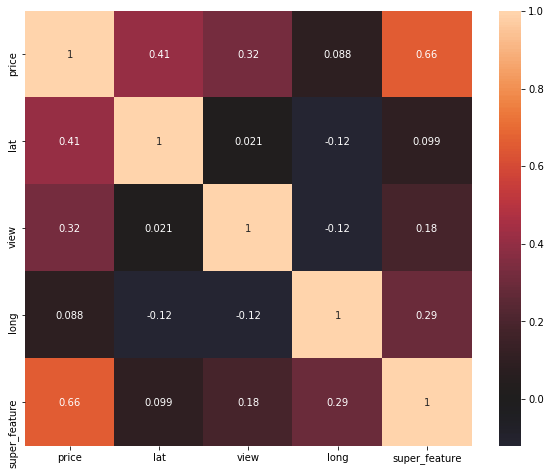

In [248]:
plt.figure(figsize=(10,8))
sns.heatmap(super_feat.corr(), center=0, annot=True);

# Model Validation

Now that we have our model, we need to test it against our dataset to determine whether or not it is actually predictive. Let's try the **train-test-split** method first, then we'll compare that to **cross-validation with K-folds**.

First, let's see how our overall model is looking in OLS.

***Warning:*** This will take a fair amount of time to run this process

In [249]:
# defining a function that will iterate through a variety of 
# train-test splits, with each proportion being iterated through
# 100 times and averaged out to eliminate any potential bias that 
# randomly poor selection might create
def range_test_sizes(x,y, lower_bound, upper_bound, iterations):
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    index = np.linspace(lower_bound, upper_bound, num=iterations, endpoint=True)
    index = np.around(index, 3)
    avg_train_errors = []
    avg_test_errors = []
    for i in index:
        train_errors = []
        test_errors = []
        for iter in range(0,100):
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i)
            linreg.fit(x_train, y_train)
            y_hat_train = linreg.predict(x_train)
            y_hat_test = linreg.predict(x_test)
            mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
            mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
            train_errors.append(mse_train)
            test_errors.append(mse_test)
        avg_train_errors.append(np.mean(train_errors))
        avg_test_errors.append(np.mean(test_errors))
    return [index, avg_train_errors, avg_test_errors]

In [250]:
y = super_feat['price']
x = super_feat.drop(['price'], axis=1)

In [251]:
# running the function on our dataset
data = range_test_sizes(x,y,0.5,0.95,50)

In [252]:
print(data)

[array([0.5  , 0.509, 0.518, 0.528, 0.537, 0.546, 0.555, 0.564, 0.573,
       0.583, 0.592, 0.601, 0.61 , 0.619, 0.629, 0.638, 0.647, 0.656,
       0.665, 0.674, 0.684, 0.693, 0.702, 0.711, 0.72 , 0.73 , 0.739,
       0.748, 0.757, 0.766, 0.776, 0.785, 0.794, 0.803, 0.812, 0.821,
       0.831, 0.84 , 0.849, 0.858, 0.867, 0.877, 0.886, 0.895, 0.904,
       0.913, 0.922, 0.932, 0.941, 0.95 ]), [26345077401.396744, 26359306865.159225, 26316724577.381237, 26344153615.987328, 26311110077.11225, 26314617344.42507, 26357950645.793125, 26399743740.954002, 26291704698.351196, 26308541825.11127, 26349565556.60405, 26341169761.57211, 26350098127.003212, 26350153792.39001, 26310434658.400658, 26417830001.500954, 26353754698.207863, 26283061595.780304, 26349485848.428726, 26270885826.274258, 26341336371.793667, 26529030151.10358, 26269987279.956635, 26404398169.192753, 26423184035.975742, 26420293120.589546, 26225359703.469254, 26356028627.557083, 26417196651.049076, 26311089798.684643, 26379538457

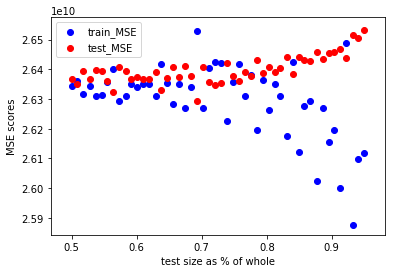

In [253]:
# plotting our results
plt.scatter(data[0], data[1], color='blue', label="train_MSE")
plt.scatter(data[0], data[2], color='red', label="test_MSE")
plt.legend()
plt.xlabel('test size as % of whole')
plt.ylabel('MSE scores')
plt.show()

### Alternatively, let's see what the **K-folds** method of cross-validation tells us.

In [254]:
linreg = LinearRegression()
linreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [255]:
cv_20_results = cross_val_score(linreg, x, y, cv=20, scoring="neg_mean_squared_error")
cv_20_results

array([-2.46109434e+10, -2.48313464e+10, -2.47949333e+10, -2.93876357e+10,
       -2.61828756e+10, -2.50303238e+10, -2.59975653e+10, -2.68171210e+10,
       -2.68289838e+10, -2.76047547e+10, -2.74192743e+10, -2.78517721e+10,
       -2.19934060e+10, -2.48036023e+10, -2.58022791e+10, -2.93410660e+10,
       -2.68729821e+10, -2.84665412e+10, -2.72585109e+10, -2.57424434e+10])

In [256]:
print('Root Mean Squared Error : ', np.sqrt(np.mean(cv_20_results)*-1))

Root Mean Squared Error :  162425.11511634928


So with our current model we can predict house prices with an average error margin of **162,473.31 dollars**. That's not a great margin of error, but at least we can be super confident about our model accurately predicting the price within that error range. Not great for business, but adequate for this project!

Let's see what our final OLS looks like.

In [257]:
y = super_feat['price']
x = super_feat.drop(['price'], axis=1)

linreg = sm.OLS(y, x).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                 3.592e+04
Date:                Fri, 31 May 2019   Prob (F-statistic):               0.00
Time:                        18:49:56   Log-Likelihood:            -2.4713e+05
No. Observations:               18215   AIC:                         4.943e+05
Df Residuals:                   18211   BIC:                         4.943e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
lat            5.971e+05   3452.629    172.942      0.000     5.9e+05    6.04e+05
view           1.081e+05   2099.682     51.466      0.000    1.04e+05    1.12e+05
long           2.516e+05   4285.587     58.707      0.000    2.43e+05     2.6e+05
super_feature  8.741e+05   1.07e+04     81.549      0.000    8.53e+05    8.95e+05
==============================================================================
Omnibus:                     1612.026   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3378.075
Skew:                           0.578   Prob(JB):                         0.00
Kurtosis:                       4.765   Cond. No.                         6.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# What does it all mean??

Well, the biggest take away from this process is that we need a **much** better dataset if we are going to attempt to predict the sale price of a home. The problem here is that there are so many additional variables that are not accounted for (local crime rate, access to public transportation/highways, quality of schools, etc.) that there is no way that this model could be used by itself to predict the sale price of a house. In the end, the data is insufficient to be useful beyond very generalized trends.

These include common sense statements like "a bigger house costs more" or "a nicer house (grade) costs more". Ultimately, this dataset by itself is of no use to anyone. My recommendation is to acquire a better dataset that includes a wider range of information about the neighborhoods in which the houses exist. 